In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns; sns.set()
from sklearn.linear_model import SGDClassifier 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import *
import time


%matplotlib inline

In [2]:
cd code

/Users/tianchushu/Desktop/syntaxerror-mlpp2018/code


In [3]:
import final_connection
import final_default_grids
import final_explore_and_viz
import final_load_dfs
import final_plot
import final_preprocessing
import final_temporal
import indpv_lists as final_options
import jocojims
import final_classifier_final

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [4]:
# LOADS CSV WITH MERGED DATA WITH ACS
df = final_load_dfs.load_from_file('FINAL.csv')

#Save a clean copy for later viz purpose
viz_df = df.copy()

# FINDING BASE PROBABILITY OF RE-ENTRY
print ('Prob of re-entry within one year')
print (df['within_one'].sum()/df.shape[0])
print ('Prob of re-entry within two year')
print (df['within_two'].sum()/df.shape[0])
print (' ')


LoadedFINAL.csv
Prob of re-entry within one year
0.21966193263209594
Prob of re-entry within two year
0.2725821634674416
 


In [5]:
# DROPPING COLUMNS NOT USED IN ANALYSIS
print('DROPPING THESE COLUMNS: ', jocojims.DROP_COLS)
df = df.drop(jocojims.DROP_COLS, axis = 1)
print (' ')

# CREATING DUMMIES
print ('The following columns have been broken into dummies:' , jocojims.DUMMIES)
for dummy in jocojims.DUMMIES:
    df = final_preprocessing.dummy_variable(dummy, df)
print (' ')

# DISCRETIZATION
for category in jocojims.CATS:
    df = final_preprocessing.bin_gen(df, category, '_bin', 'suffix' )
print ('Discretizing the following variables: ', jocojims.CATS)
print (' ')

DROPPING THESE COLUMNS:  ['re_entry', 'mni_no', 'dedupe_id', 'dob', 'state', 'city', 'zip', 'release_date', 'case_no', 'booking_no', 'after_released']
 
The following columns have been broken into dummies: ['sex', 'race', 'mar_stat', 'case_type', 'arresting_agency', 'arresting_agency_type', 'bail_type', 'pri_dx_value', 'refferal_source']
 
Discretizing the following variables:  ['age', 'per_capita_income', 'poverty_stat', 'household_income', 'mortgage_stat', 'school_enrollment_16-19', 'own_children_under18', 'SSI_income', 'grandparent_care', 'military_service', 'education_25', 'property_value_occupied', 'retirement_income', 'rent_over_income', 'bail_amt']
 


In [6]:
list(df.columns)

['booking_date',
 'bailed_out',
 'mh_treatment',
 'within_one',
 'within_two',
 'sexFEMALE',
 'sexMALE',
 'sexmissing',
 'raceAMERICAN INDIAN OR ALASKA NATIVE',
 'raceASIAN',
 'raceBLACK OR AFRICAN AMERICAN',
 'raceWHITE',
 'mar_statA',
 'mar_statD',
 'mar_statM',
 'mar_statN',
 'mar_statS',
 'mar_statU',
 'mar_statW',
 'mar_statY',
 'mar_statmissing',
 'case_typeCR',
 'case_typeDV',
 'case_typeJV',
 'arresting_agencyFAIRWAY P.D.',
 'arresting_agencyGARDNER P.D.',
 'arresting_agencyJOHNSON COUNTY PARK PATROL',
 "arresting_agencyJOHNSON COUNTY SHERIFF'S DEPARTMENT",
 'arresting_agencyKANSAS HIGHWAY PATROL',
 'arresting_agencyLAKE QUIVIRA P.D.',
 'arresting_agencyLEAWOOD P.D.',
 'arresting_agencyLENEXA P.D.',
 'arresting_agencyMERRIAM P.D.',
 'arresting_agencyMISSION P.D.',
 'arresting_agencyOLATHE P.D.',
 'arresting_agencyOTHER AGENCY',
 'arresting_agencyOVERLAND PARK P.D.',
 'arresting_agencyPRAIRIE VILLAGE P.D.',
 'arresting_agencyROELAND PARK P.D.',
 'arresting_agencySHAWNEE MISSION 

In [7]:
# SETTING DATES FOR SEPARATING TRAIN & TESTING DATA
end =  df['booking_date'].max()[:10]
start =  df['booking_date'].min()[:10]
middle_date = '2015-07-01'

# SPLITTING DATASET INTO TRAINING AND TESTING
train, test = final_temporal.temporal_split(df, 'booking_date', start, middle_date, end)
trainv,testv = final_temporal.temporal_split(viz_df, 'booking_date', start, middle_date, end)


# SPLITTING DEPENDENT AND INDEPENDENT VARIABLES
# within_one == come back within one year
# within_two == come back within two year
y = ['within_one', 'within_two']
x_train, x_test, y_train, y_test = final_temporal.split_data(train, test, y)

a, viz_x, b, c = final_temporal.split_data(trainv,testv, y)

In [8]:
final_options.bail_info

['mar_statA',
 'mar_statD',
 'mar_statM',
 'mar_statN',
 'mar_statS',
 'mar_statU',
 'mar_statW',
 'mar_statY',
 'mar_statmissing',
 'age_bin1',
 'age_bin2',
 'age_bin3',
 'age_bin4',
 'own_children_under18_bin1',
 'own_children_under18_bin2',
 'own_children_under18_bin3',
 'own_children_under18_bin4',
 'grandparent_care_bin1',
 'grandparent_care_bin2',
 'grandparent_care_bin3',
 'grandparent_care_bin4',
 'military_service_bin1',
 'military_service_bin2',
 'military_service_bin3',
 'military_service_bin4',
 'raceAMERICAN INDIAN OR ALASKA NATIVE',
 'raceASIAN',
 'raceBLACK OR AFRICAN AMERICAN',
 'raceWHITE',
 'sexFEMALE',
 'sexMALE',
 'sexmissing',
 'per_capita_income_bin1',
 'per_capita_income_bin2',
 'per_capita_income_bin3',
 'per_capita_income_bin4',
 'poverty_stat_bin1',
 'poverty_stat_bin2',
 'poverty_stat_bin3',
 'poverty_stat_bin4',
 'household_income_bin1',
 'household_income_bin2',
 'household_income_bin3',
 'household_income_bin4',
 'mortgage_stat_bin1',
 'mortgage_stat_bin2'

In [9]:
#Running on bail var
x_train = x_train[final_options.bail_info]
x_test = x_test[final_options.bail_info]

In [10]:
results = final_classifier_final.clf_loop(["RF", 'Boost', 'Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_one'], y_test['within_one'])

In [11]:
best = final_classifier_final.best_grid(results)

,model_type,parameters,auc-roc,precision,time,"precision,recall,f1 at_5","precision,recall,f1 at_10","precision,recall,f1 at_20"
25,Bag,"{'max_features': 5, 'max_samples': 5, 'n_estim...",0.5549,0.2376,0.0436,"(0.6374, 0.1593, 0.2549)","(0.4231, 0.2115, 0.2821)","(0.2747, 0.2747, 0.2747)"
22,Boost,"{'algorithm': 'SAMME.R', 'n_estimators': 100}",0.6888,0.3597,2.0453,"(0.4615, 0.1154, 0.1846)","(0.4643, 0.2321, 0.3095)","(0.3997, 0.3997, 0.3997)"
113,ET,"{'criterion': 'entropy', 'max_depth': 50, 'max...",0.7055,0.3681,1.2194,"(0.467, 0.1168, 0.1868)","(0.4396, 0.2198, 0.293)","(0.3915, 0.3915, 0.3915)"
45,Logit,"{'C': 0.1, 'penalty': 'l2'}",0.6874,0.3657,0.1322,"(0.4505, 0.1126, 0.1802)","(0.478, 0.239, 0.3187)","(0.397, 0.397, 0.397)"
114,NB,{},0.6441,0.2961,0.0917,"(0.4286, 0.1071, 0.1714)","(0.3379, 0.169, 0.2253)","(0.3077, 0.3077, 0.3077)"
15,RF,"{'max_depth': 50, 'max_features': 'log2', 'min...",0.7111,0.3720,1.6850,"(0.4396, 0.1099, 0.1758)","(0.4313, 0.2157, 0.2875)","(0.386, 0.386, 0.386)"
70,Tree,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.6748,0.3275,0.0223,"(0.4286, 0.1071, 0.1714)","(0.4203, 0.2102, 0.2802)","(0.3723, 0.3723, 0.3723)"


In [12]:
best

{'Bag': {'max_features': [5], 'max_samples': [5], 'n_estimators': [10]},
 'Boost': {'algorithm': ['SAMME.R'], 'n_estimators': [100]},
 'ET': {'criterion': ['entropy'],
  'max_depth': [50],
  'max_features': ['log2'],
  'min_samples_split': [10],
  'n_estimators': [100],
  'n_jobs': [-1]},
 'Logit': {'C': [0.1], 'penalty': ['l2']},
 'NB': {},
 'RF': {'max_depth': [50],
  'max_features': ['log2'],
  'min_samples_split': [10],
  'n_estimators': [100]},
 'Tree': {'criterion': ['entropy'],
  'max_depth': [10],
  'max_features': ['sqrt'],
  'min_samples_split': [2]}}

In [13]:
df_sorting = final_classifier_final.finding_risk_scores(x_train, x_test, y_train['within_one'], y_test['within_one'], best, viz_x)

Bag
Boost
ET
Logit
NB
RF
Tree


In [14]:
#Use the best performed Random Forest model to see the top 10% at risk people's data

In [15]:
RF_df = df_sorting.sort_values(by=['RF'], ascending=False)

In [16]:
RF_df.columns

Index(['SSI_income', 'after_released', 'age', 'arresting_agency',
       'arresting_agency_type', 'bail_amt', 'bail_type', 'bailed_out',
       'booking_no', 'case_no', 'case_type', 'city', 'dedupe_id', 'dob',
       'education_25', 'grandparent_care', 'household_income', 'mar_stat',
       'mh_treatment', 'military_service', 'mni_no', 'mortgage_stat',
       'own_children_under18', 'per_capita_income', 'poverty_stat',
       'pri_dx_value', 'property_value_occupied', 'race', 're_entry',
       'refferal_source', 'release_date', 'rent_over_income',
       'retirement_income', 'school_enrollment_16-19', 'sex', 'state', 'zip',
       'Bag', 'Boost', 'ET', 'Logit', 'NB', 'RF', 'Tree'],
      dtype='object')

In [17]:
RF_df[:200]

,SSI_income,after_released,age,arresting_agency,arresting_agency_type,bail_amt,bail_type,bailed_out,booking_no,case_no,...,sex,state,zip,Bag,Boost,ET,Logit,NB,RF,Tree
18822,388,218.0,33.0,PRAIRIE VILLAGE P.D.,CITY,NaN,SUR,0,16002633,15DV00945,...,MALE,KS,66208,0.216667,0.499123,1.000000,0.446513,0.951157,0.951751,0.513333
525,407,443.0,23.0,OLATHE P.D.,CITY,NaN,SUR,0,16004364,16CR01002,...,MALE,KS,66062,0.466667,0.498981,0.962222,0.406316,0.999990,0.882186,0.629032
3048,475,85.0,20.0,OLATHE P.D.,CITY,NaN,SUR,0,16001575,16DV00160,...,MALE,KS,66061,0.316667,0.501044,0.867766,0.602498,1.000000,0.839971,0.555184
4214,475,0.0,23.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,3500.0,SUR,1,15008588,14DV01329,...,MALE,KS,66061,0.216667,0.500551,0.888889,0.555062,1.000000,0.829973,0.555184
3100,475,565.0,22.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,3500.0,SUR,1,16002183,16DV00211,...,MALE,KS,66061,0.216667,0.500551,0.888889,0.555062,1.000000,0.829973,0.555184
2530,475,64.0,23.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,3500.0,SUR,1,16005135,16DV00525,...,MALE,KS,66061,0.216667,0.500551,0.888889,0.555062,1.000000,0.829973,0.555184
3361,475,0.0,23.0,OVERLAND PARK P.D.,CITY,NaN,SUR,0,15011589,15CR02427,...,FEMALE,KS,66061,0.216667,0.499752,0.906151,0.464723,1.000000,0.819973,0.350267
15867,627,60.0,24.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,15009801,15CR01968,...,MALE,KS,66216,0.116667,0.499507,0.918730,0.422128,0.999832,0.793593,0.613636
823,407,213.0,17.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,15001117,15JV01201,...,MALE,KS,66062,0.366667,0.502294,0.872083,0.723160,1.000000,0.790069,0.743590
825,407,54.0,18.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16000075,15JV01406,...,MALE,KS,66062,0.366667,0.502294,0.872083,0.723160,1.000000,0.790069,0.743590


In [18]:
features_to_see = ['bail_amt', 'bail_type', 'bailed_out','case_type', 'city', 
       'education_25', 'grandparent_care', 'household_income', 'mar_stat',
       'mh_treatment', 'military_service', 'mortgage_stat',
       'own_children_under18', 'per_capita_income', 'poverty_stat',
       'property_value_occupied', 'race', 're_entry', 'rent_over_income']

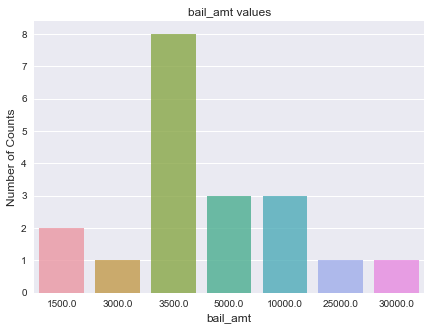

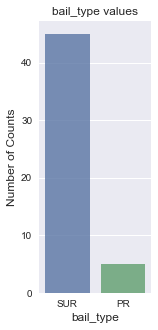

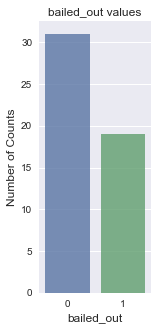

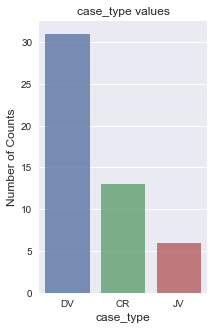

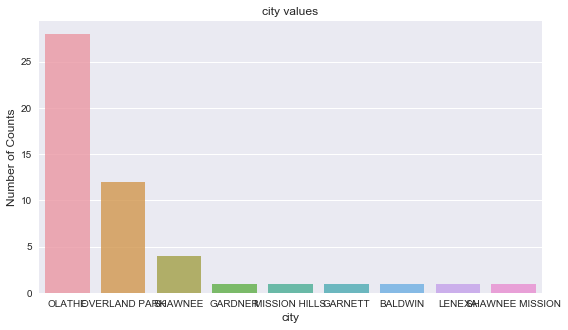

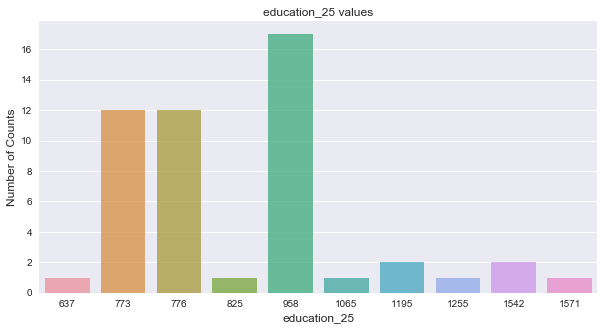

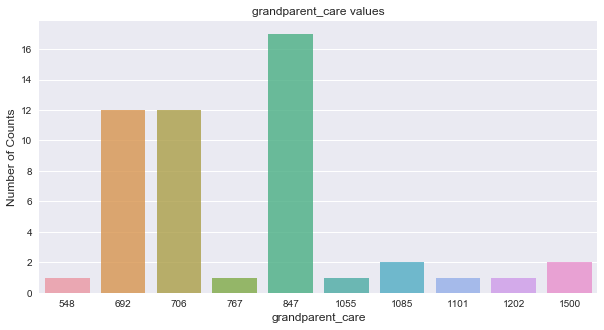

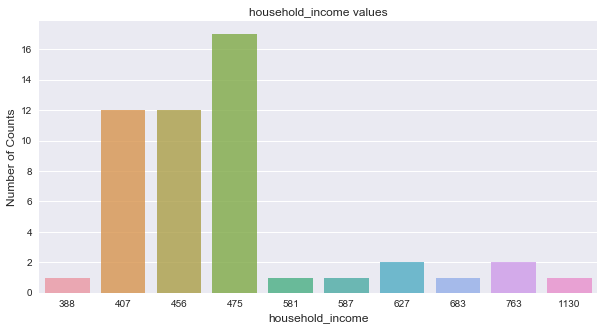

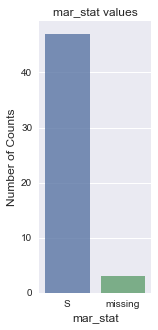

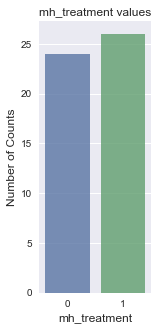

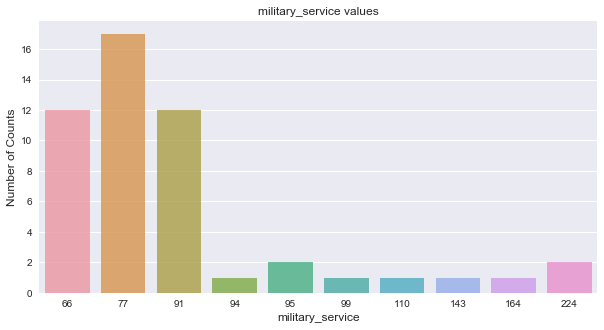

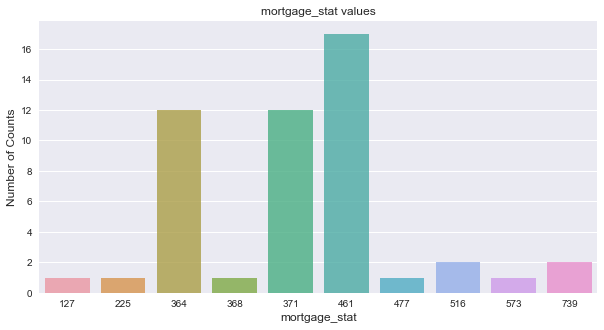

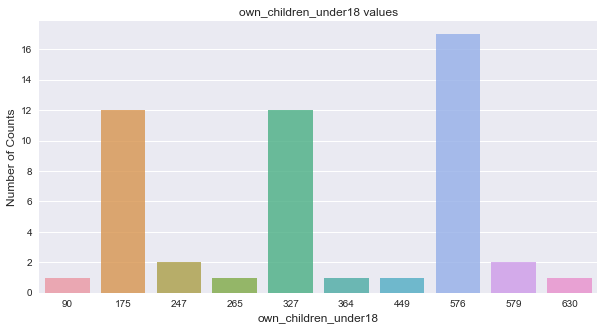

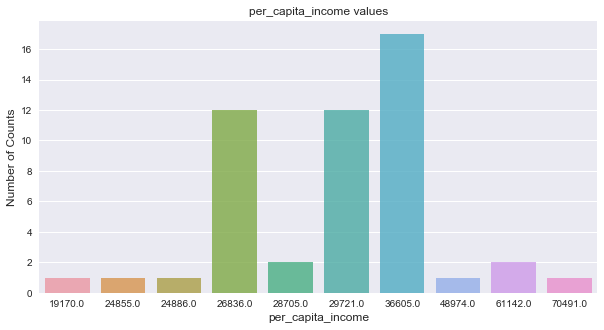

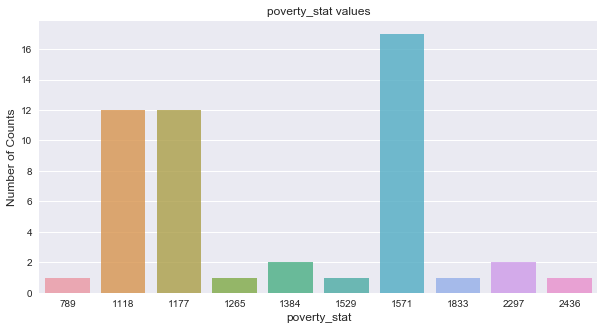

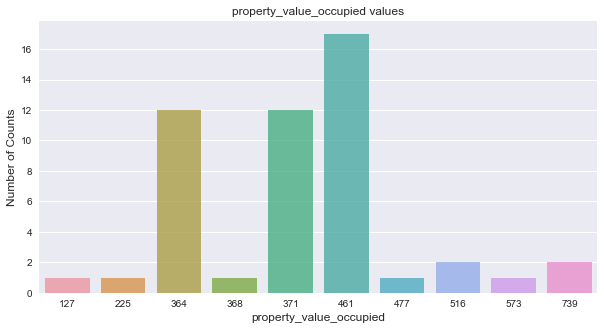

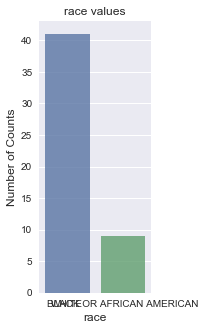

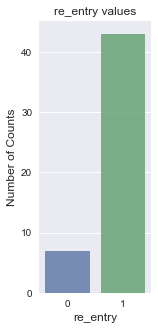

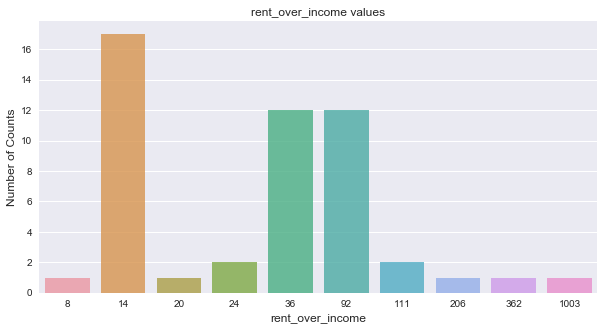

In [19]:
final_plot.plot_df(RF_df[:50], features_to_see, save=False)

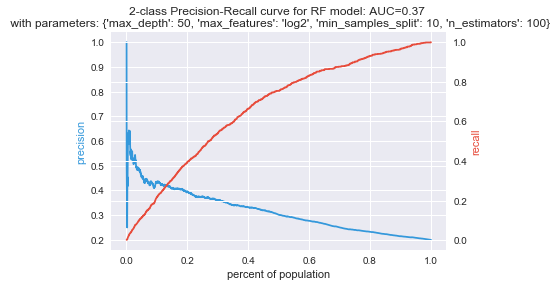

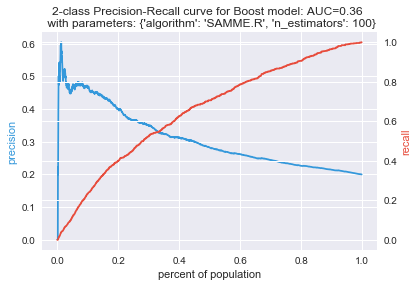

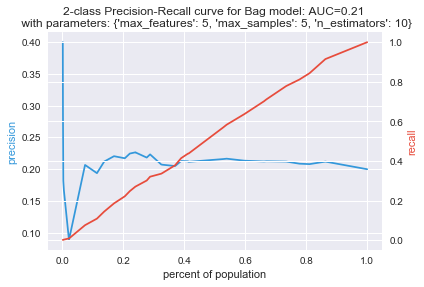

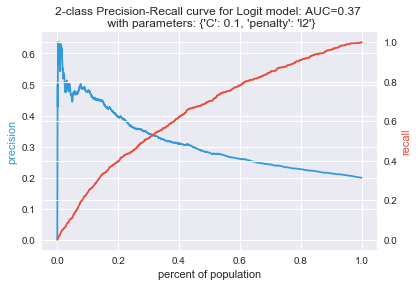

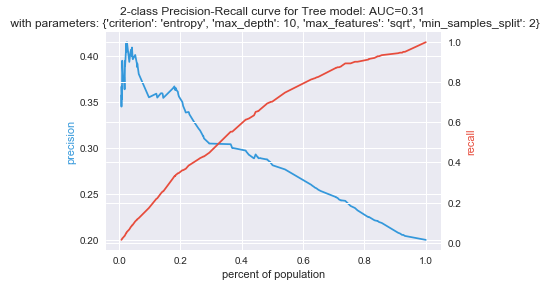

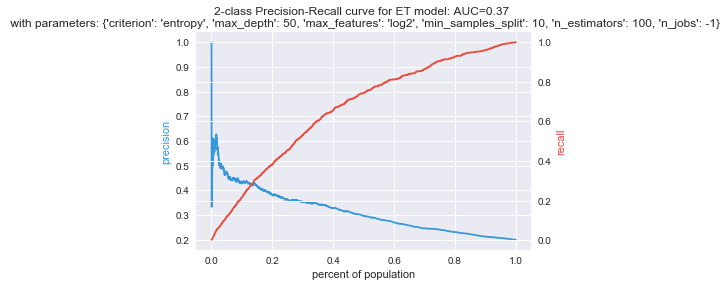

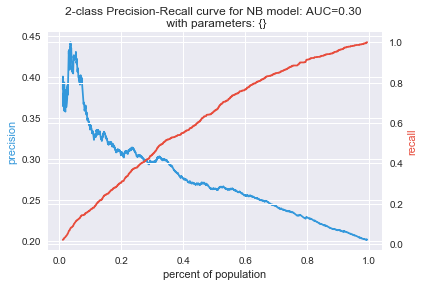

In [20]:
final_plot.plot_best(["RF", "Boost", "Bag", "Logit", "Tree",  "ET", "NB"],  x_train, x_test, y_train['within_one'], y_test['within_one'], best)

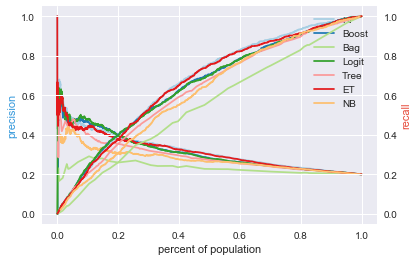

In [21]:
final_plot.plot_mult(['RF', 'Boost','Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_one'], y_test['within_one'], best)

Feature ranking for within_one
1. bailed_out (0.044525)
2. bail_typeSUR (0.039602)
3. case_typeCR (0.034440)
4. bail_amt_bin1 (0.033139)
5. age_bin1 (0.028402)
6. case_typeDV (0.026001)
7. sexMALE (0.025401)
8. bail_typePR (0.024956)
9. sexFEMALE (0.024080)
10. bail_amt_bin3 (0.023678)
11. age_bin4 (0.022742)
12. bail_amt_bin2 (0.022645)
13. mar_statS (0.022498)
14. age_bin2 (0.022398)
15. case_typeJV (0.022047)
16. age_bin3 (0.020913)
17. bail_amt_bin4 (0.020529)
18. mar_statM (0.020093)
19. arresting_agencyOLATHE P.D. (0.019060)
20. raceWHITE (0.018101)


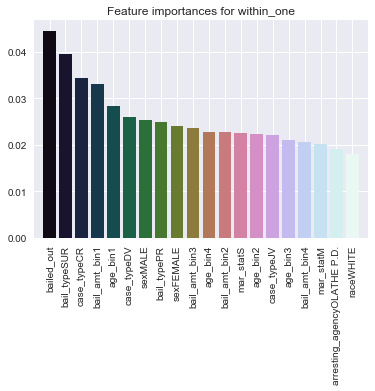

In [22]:
final_plot.feature_importance(x_train, y_train['within_one'], best, "ET",20)

In [23]:
########Running everything on second y within two year of re-entry

In [24]:
results2 = final_classifier_final.clf_loop(["RF", 'Boost', 'Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_two'], y_test['within_two'])

In [25]:
best2 = final_classifier_final.best_grid(results2)

,model_type,parameters,auc-roc,precision,time,"precision,recall,f1 at_5","precision,recall,f1 at_10","precision,recall,f1 at_20"
38,Bag,"{'max_features': 10, 'max_samples': 10, 'n_est...",0.5736,0.3130,0.0649,"(0.4176, 0.0809, 0.1356)","(0.3736, 0.1448, 0.2087)","(0.3558, 0.2758, 0.3107)"
22,Boost,"{'algorithm': 'SAMME.R', 'n_estimators': 100}",0.6864,0.4343,1.8451,"(0.5659, 0.1097, 0.1838)","(0.5687, 0.2204, 0.3177)","(0.489, 0.3791, 0.4271)"
109,ET,"{'criterion': 'entropy', 'max_depth': 50, 'max...",0.7074,0.4581,1.6267,"(0.5714, 0.1108, 0.1855)","(0.5522, 0.2141, 0.3085)","(0.489, 0.3791, 0.4271)"
43,Logit,"{'C': 0.01, 'penalty': 'l2'}",0.6883,0.4436,0.0931,"(0.5879, 0.114, 0.1909)","(0.5577, 0.2162, 0.3116)","(0.4986, 0.3866, 0.4355)"
114,NB,{},0.6450,0.3682,0.0784,"(0.489, 0.0948, 0.1588)","(0.4258, 0.1651, 0.2379)","(0.3874, 0.3003, 0.3383)"
15,RF,"{'max_depth': 50, 'max_features': 'log2', 'min...",0.7170,0.4645,1.6224,"(0.5549, 0.1076, 0.1802)","(0.5467, 0.2119, 0.3054)","(0.4973, 0.3855, 0.4343)"
71,Tree,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.6677,0.4017,0.0259,"(0.5385, 0.1044, 0.1748)","(0.5192, 0.2013, 0.2901)","(0.4464, 0.3461, 0.3899)"


In [26]:
best2

{'Bag': {'max_features': [10], 'max_samples': [10], 'n_estimators': [20]},
 'Boost': {'algorithm': ['SAMME.R'], 'n_estimators': [100]},
 'ET': {'criterion': ['entropy'],
  'max_depth': [50],
  'max_features': ['sqrt'],
  'min_samples_split': [10],
  'n_estimators': [100],
  'n_jobs': [-1]},
 'Logit': {'C': [0.01], 'penalty': ['l2']},
 'NB': {},
 'RF': {'max_depth': [50],
  'max_features': ['log2'],
  'min_samples_split': [10],
  'n_estimators': [100]},
 'Tree': {'criterion': ['entropy'],
  'max_depth': [10],
  'max_features': ['sqrt'],
  'min_samples_split': [5]}}

In [27]:
df_sorting2 = final_classifier_final.finding_risk_scores(x_train, x_test, y_train['within_two'], y_test['within_two'], best2, viz_x)

Bag
Boost
ET
Logit
NB
RF
Tree


In [28]:
RF_df2 = df_sorting2.sort_values(by=['RF'], ascending=False)

In [29]:
RF_df2[:200]

,SSI_income,after_released,age,arresting_agency,arresting_agency_type,bail_amt,bail_type,bailed_out,booking_no,case_no,...,sex,state,zip,Bag,Boost,ET,Logit,NB,RF,Tree
18822,388,218.0,33.0,PRAIRIE VILLAGE P.D.,CITY,NaN,SUR,0,16002633,15DV00945,...,MALE,KS,66208,0.383333,0.500235,1.000000,0.524778,9.135586e-01,0.946861,0.382353
823,407,213.0,17.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,15001117,15JV01201,...,MALE,KS,66062,0.350000,0.502980,0.994444,0.741366,1.000000e+00,0.921571,0.778846
825,407,54.0,18.0,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16000075,15JV01406,...,MALE,KS,66062,0.350000,0.502980,0.994444,0.741366,1.000000e+00,0.921571,0.778846
525,407,443.0,23.0,OLATHE P.D.,CITY,NaN,SUR,0,16004364,16CR01002,...,MALE,KS,66062,0.325000,0.500285,0.965556,0.508871,9.999957e-01,0.895960,0.508772
3048,475,85.0,20.0,OLATHE P.D.,CITY,NaN,SUR,0,16001575,16DV00160,...,MALE,KS,66061,0.175000,0.502161,0.943829,0.682547,1.000000e+00,0.894546,0.645161
532,407,365.0,19.0,OLATHE P.D.,CITY,NaN,SUR,0,15011296,15DV01231,...,MALE,KS,66062,0.325000,0.501994,0.968758,0.668558,9.999978e-01,0.875090,0.508772
533,407,-41.0,19.0,OLATHE P.D.,CITY,NaN,SUR,0,15011296,15DV01231,...,MALE,KS,66062,0.325000,0.501994,0.968758,0.668558,9.999978e-01,0.875090,0.508772
1337,407,0.0,NaN,JOHNSON COUNTY SHERIFF'S DEPARTMENT,COUNTY SHERIFF,NaN,SUR,0,16005188,16DV00413,...,MALE,KS,66062,0.350000,0.501645,0.829190,0.659145,9.999952e-01,0.853731,0.508772
7425,456,255.0,19.0,OVERLAND PARK P.D.,CITY,NaN,SUR,0,15013138,15DV01442,...,MALE,KS,66212,0.275000,0.502046,0.927262,0.669827,9.999976e-01,0.844028,0.581081
8294,456,0.0,23.0,OVERLAND PARK P.D.,CITY,NaN,SUR,0,16001080,16DV00114,...,MALE,KS,66212,0.275000,0.502046,0.927262,0.669827,9.999976e-01,0.844028,0.581081


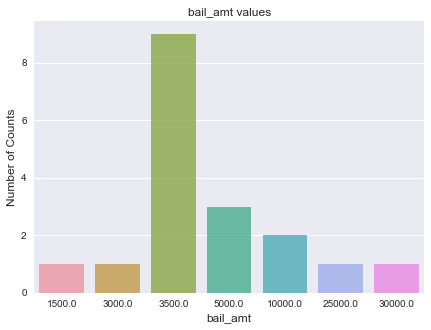

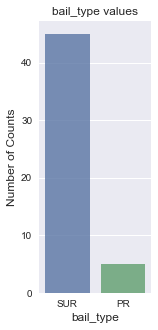

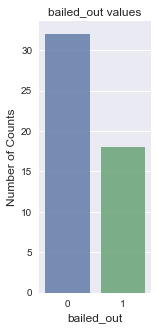

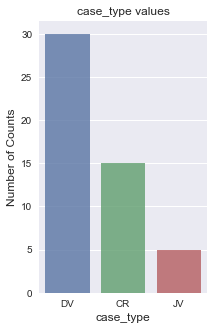

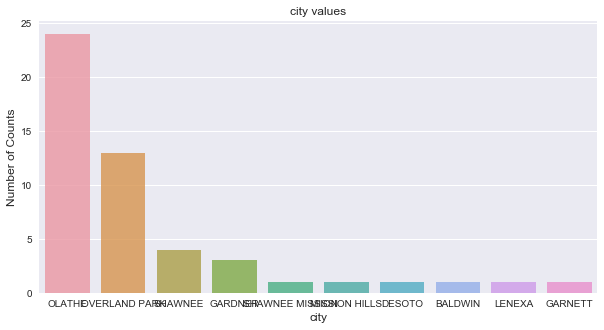

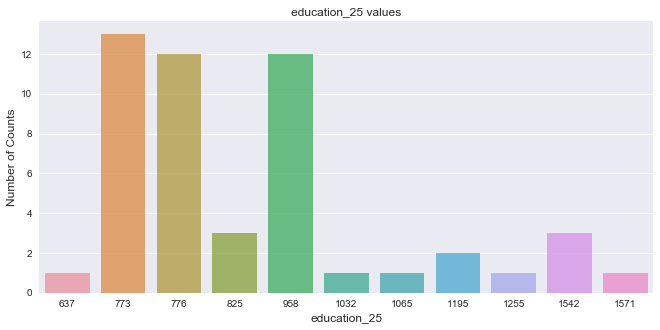

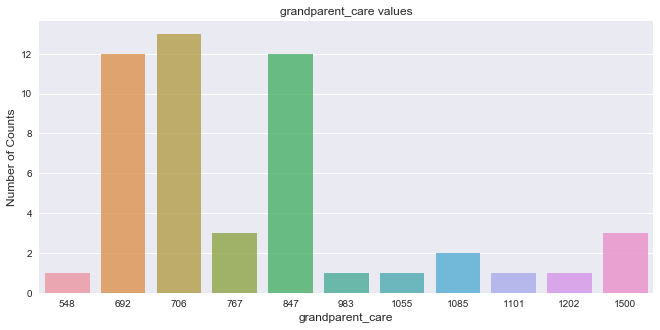

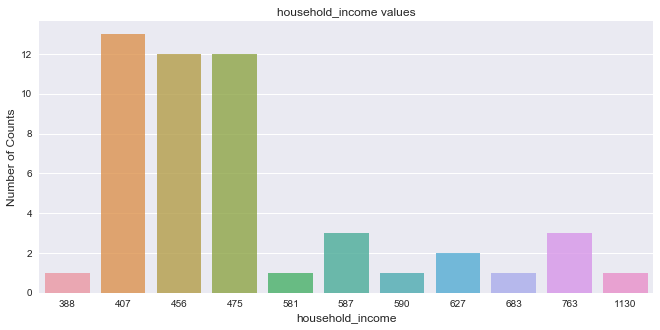

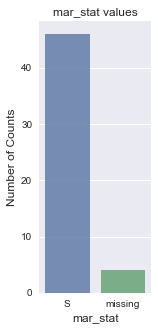

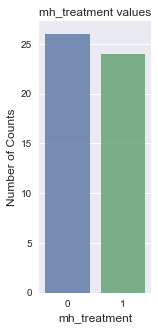

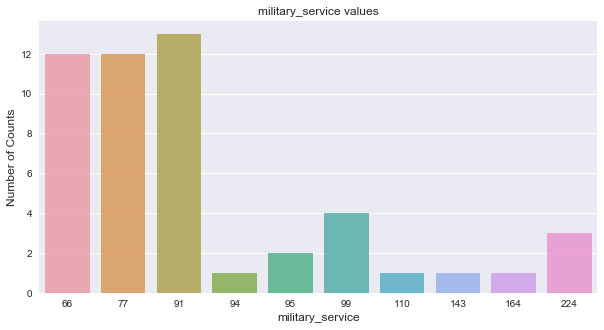

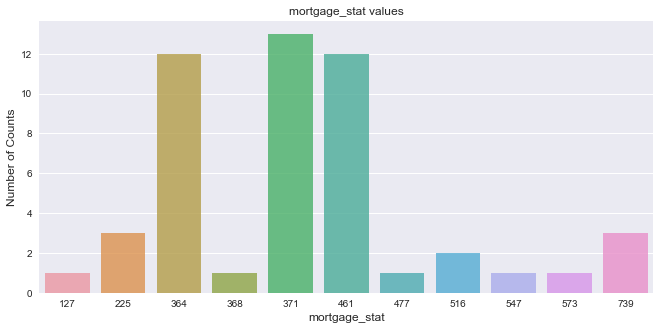

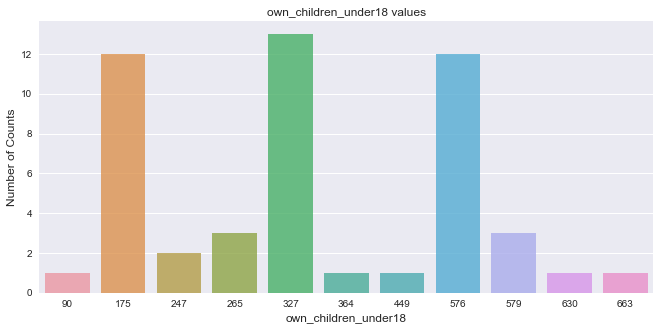

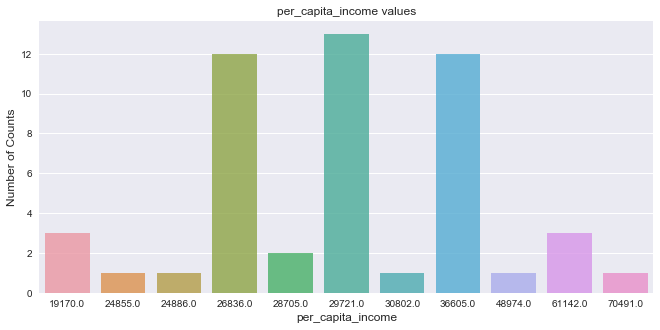

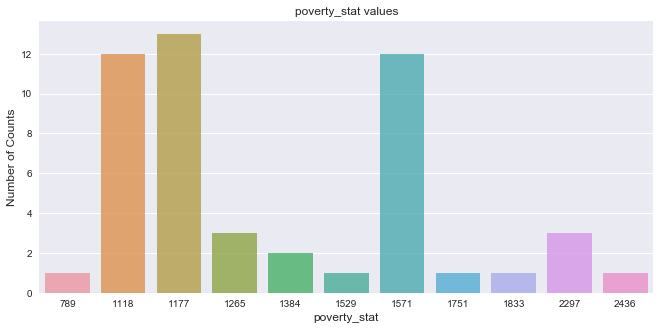

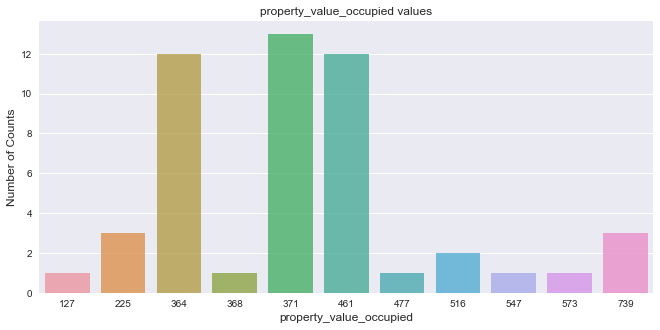

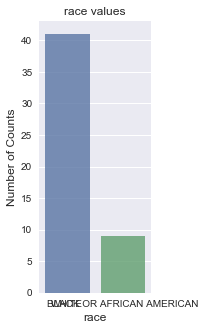

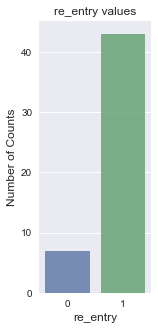

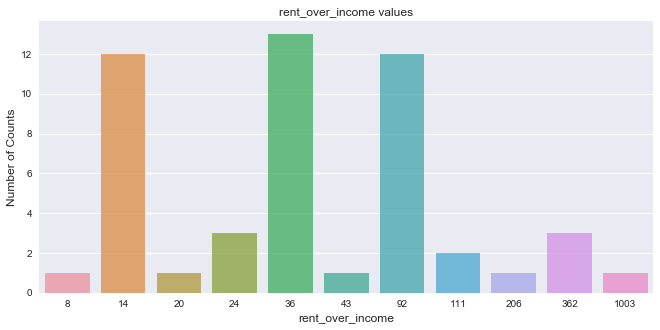

In [30]:
final_plot.plot_df(RF_df2[:50], features_to_see, save=False)

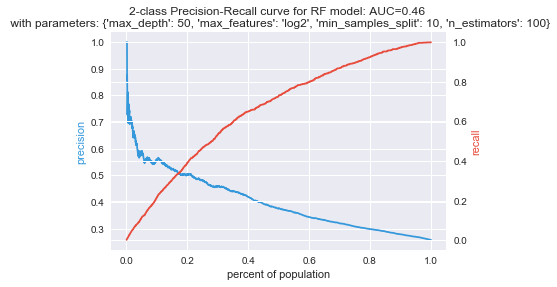

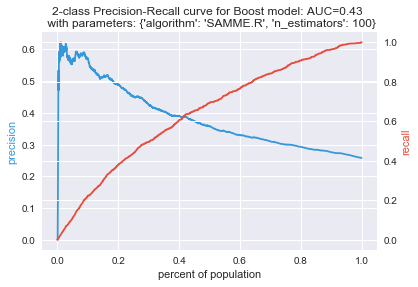

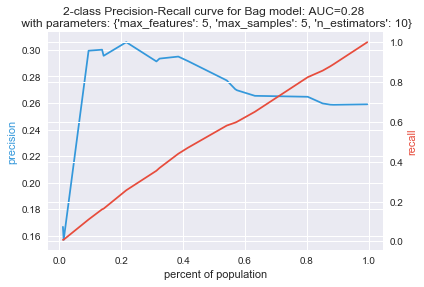

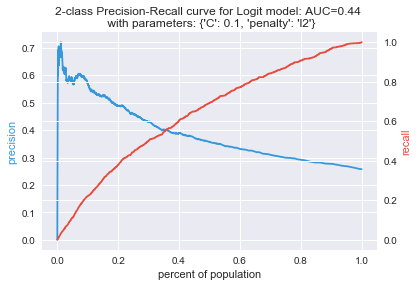

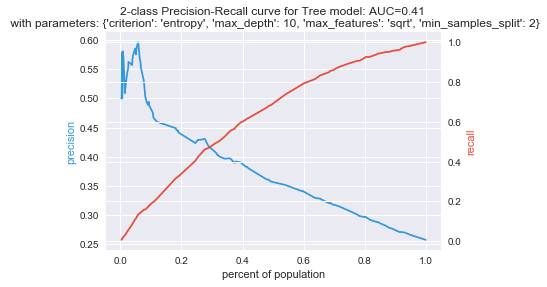

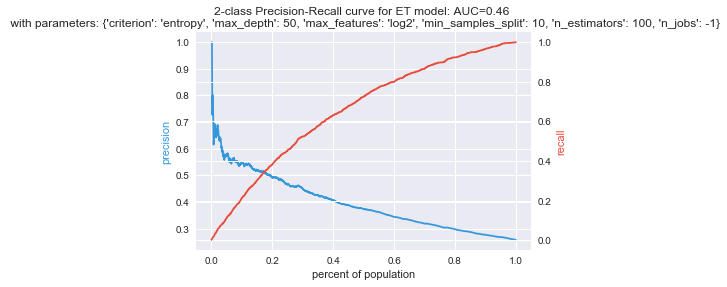

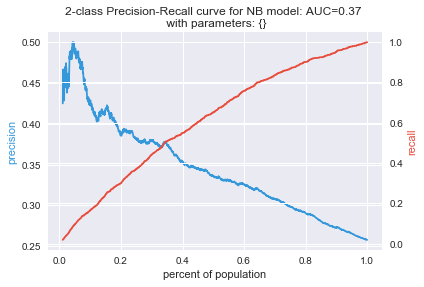

In [31]:
final_plot.plot_best(["RF", "Boost", "Bag", "Logit", "Tree",  "ET", "NB"],  x_train, x_test, y_train['within_two'], y_test['within_two'], best)

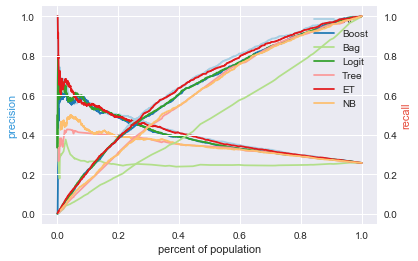

In [32]:
final_plot.plot_mult(['RF', 'Boost','Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_two'], y_test['within_two'], best2)

Feature ranking for within_two
1. bailed_out (0.046157)
2. bail_typeSUR (0.034189)
3. case_typeCR (0.031570)
4. bail_amt_bin1 (0.029954)
5. age_bin1 (0.027082)
6. case_typeDV (0.025529)
7. sexMALE (0.023561)
8. sexFEMALE (0.023520)
9. bail_typePR (0.023412)
10. mar_statS (0.022675)
11. age_bin4 (0.020917)
12. age_bin2 (0.020824)
13. bail_amt_bin3 (0.020809)
14. age_bin3 (0.019917)
15. bail_amt_bin2 (0.019791)
16. mar_statM (0.019345)
17. raceBLACK OR AFRICAN AMERICAN (0.019122)
18. raceWHITE (0.019104)
19. bail_amt_bin4 (0.018822)
20. arresting_agencyOLATHE P.D. (0.018694)


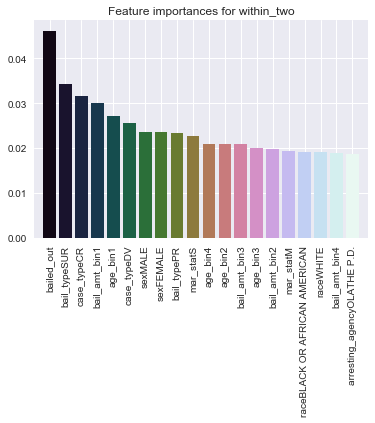

In [33]:
final_plot.feature_importance(x_train, y_train['within_two'], best2, "ET", 20)

In [34]:
################Print out the Decision Tree####################

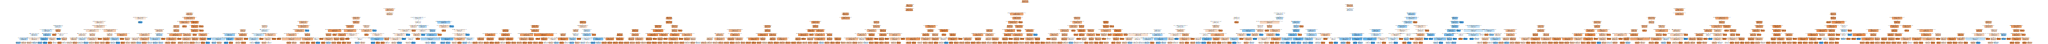

In [35]:
final_plot.print_tree(x_train, y_train["within_one"], best)